In [223]:
from IPython.core.display import display, HTML

gif_url1 = "https://indoanalytica.com/static/images/data-science-3.gif"
gif_url2 = "https://media1.tenor.com/m/lvLaG5hPCncAAAAd/data-analysis.gif"

html_code = f"""
<div style="text-align: center; margin-bottom: 20px;">
    <h1>Shopify: Decoding Shopping Trends</h1>
</div>
<div style="display: flex; justify-content: center; gap: 20px;">
    <img src="{gif_url1}" width="400">
    <img src="{gif_url2}" width="400">
</div>
"""

display(HTML(html_code))



C:\Users\deard\AppData\Local\Temp\ipykernel_18776\510464581.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Data Attributes

📌 **Customer ID** - Unique identifier for each customer.  
📌 **Age** - Age of the customer.  
📌 **Gender** - Gender of the customer (Male/Female).  
📌 **Item Purchased** - The item purchased by the customer.  
📌 **Category** - Category of the item purchased.  
📌 **Purchase Amount (USD)** - The amount of the purchase in USD.  
📌 **Location** - Location where the purchase was made.  
📌 **Size** - Size of the purchased item.  
📌 **Color** - Color of the purchased item.  
📌 **Season** - Season during which the purchase was made.  
📌 **Review Rating** - Rating given by the customer for the purchased item.  
📌 **Subscription Status** - Indicates if the customer has a subscription (Yes/No).  
📌 **Shipping Type** - Type of shipping chosen by the customer.  
📌 **Discount Applied** - Indicates if a discount was applied to the purchase (Yes/No).  
📌 **Promo Code Used** - Indicates if a promo code was used for the purchase (Yes/No).  
📌 **Previous Purchases** - Number of previous purchases made by the customer.  
📌 **Payment Method** - Customer's most preferred payment method.  
📌 **Frequency of Purchases** - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly).

In [224]:
!pip install WordCloud

In [225]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


shop = pd.read_csv('shopping_trends_updated.csv')

In [226]:
shop.shape


(3900, 18)

In [227]:
shop.to_excel('shopping_trends_updated.xlsx')

In [228]:
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [229]:
shop.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [230]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [231]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [232]:
shop.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [233]:
print(f"The unique values of the 'Gender' column are: {shop['Gender'].unique()}")
print()
print(f"The unique values of the 'Category' column are: {shop['Category'].unique()}")
print()
print(f"The unique values of the 'Size' column are: {shop['Size'].unique()}")
print()
print(f"The unique values of the 'Subscription Status' column are: {shop['Subscription Status'].unique()}")
print()
print(f"The unique values of the 'Shipping Type' column are: {shop['Shipping Type'].unique()}")
print()
print(f"The unique values of the 'Discount Applied' column are: {shop['Discount Applied'].unique()}")
print()
print(f"The unique values of the 'Promo Code Used' column are: {shop['Promo Code Used'].unique()}")
print()
print(f"The unique values of the 'Payment Method' column are: {shop['Payment Method'].unique()}")

The unique values of the 'Gender' column are: ['Male' 'Female']

The unique values of the 'Category' column are: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']

The unique values of the 'Size' column are: ['L' 'S' 'M' 'XL']

The unique values of the 'Subscription Status' column are: ['Yes' 'No']

The unique values of the 'Shipping Type' column are: ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']

The unique values of the 'Discount Applied' column are: ['Yes' 'No']

The unique values of the 'Promo Code Used' column are: ['Yes' 'No']

The unique values of the 'Payment Method' column are: ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


## OBSERVATION:
Upon initial examination of the dataset, it is evident that we have a comprehensive and well-structured dataset with 3900 rows and 18 columns. The data is complete, with no missing values, which allows us to proceed confidently with our analysis.

Let's delve into the columns and their significance in understanding our custome      

-  **Customer ID:** This column serves as a unique identifier for each customer, enabling us to differentiate between individuals.
-  **Age:** The age column provides insights into the age demographics of our customers, helping us understand their preferences and behaviors.
-  **Gender:** This column showcases the gender of the customers, enabling us to analyze buying patterns based on gender.
-  **Item Purchased:** Here, we can identify the specific products that customers have bought, allowing us to gain an understanding of popular choices.
-  **Category:** The category column categorizes the products into different groups such as clothing, footwear, and more, aiding us in analyzing trends within specific product categories.
-  **Purchase Amount (USD):** This column reveals the amount customers spent on their purchases, providing insights into their spending habits.
-  **Location:** The location column indicates the geographical location of customers, which can help identify regional trends and preferences.
-  **Size:** This column denotes the size of the purchased products, assisting in understanding size preferences across different categories.
-  **Color:** Here, we can determine the color preferences of customers, aiding in analyzing color trends and their impact on purchasing decisions.
-  **Season:** The season column allows us to identify the season during which customers made their purchases, enabling us to explore seasonal shopping trends.
-  **Review Rating:** This column showcases the ratings given by customers, providing valuable feedback on product satisfaction and quality.
-  **Subscription Status:** This column indicates whether customers have opted for a subscription status, which can help us understand customer loyalty and engagement.
-  **Shipping Type:** Here, we can identify the different shipping methods used to deliver products to customers, shedding light on preferred shipping options.
-  **Discount Applied:** This column indicates whether a discount was applied to the purchased products, enabling us to analyze the impact of discounts on customer behavior.
-  **Promo Code Used:** Here, we can identify whether customers utilized promo codes during their purchases, helping us evaluate the effectiveness of promotional campaigns.
-  **Previous Purchases:** This column reveals the number of previous purchases made by customers, aiding in understanding customer loyalty and repeat business.
-  **Payment Method:** The payment method column showcases the various methods used by customers to make their purchases, allowing us to analyze preferred payment options.
-  **Frequency of Purchases:** This column provides insights into the frequency at which customers make purchases, helping us identify patterns and customer buying habits.

ustomer buying habits.
With this rich and diverse dataset, we are well-equipped to explore customer shopping trends, understand their preferences, and uncover valuable insights that can drive informed decision-making and enhance the overall customer experience. Let's embark on this exciting analysis journey!


## 1 What is the overall distribution of customer ages in the dataset?

In [234]:
shop['Age'].value_counts()

Age
69    88
57    87
41    86
25    85
49    84
54    83
27    83
50    83
62    83
32    82
58    81
19    81
42    80
31    79
28    79
43    79
37    77
29    76
46    76
63    75
59    75
68    75
56    74
36    74
52    73
64    73
55    73
51    72
65    72
45    72
40    72
35    72
47    71
66    71
30    71
23    71
53    70
38    70
18    69
26    69
21    69
34    68
39    68
48    68
24    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64

In [235]:
shop['Age'].mean()

np.float64(44.06846153846154)

In [236]:
shop['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [237]:
shop['Age_category'] = pd.cut(shop['Age'], bins= [0,15, 18 , 30 , 50 , 70] , labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults'
                                                                                             , 'old'] )

C:\Users\deard\AppData\Local\Temp\ipykernel_18776\1936813378.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_categories = shop.groupby('Age_category')['Age'].count()


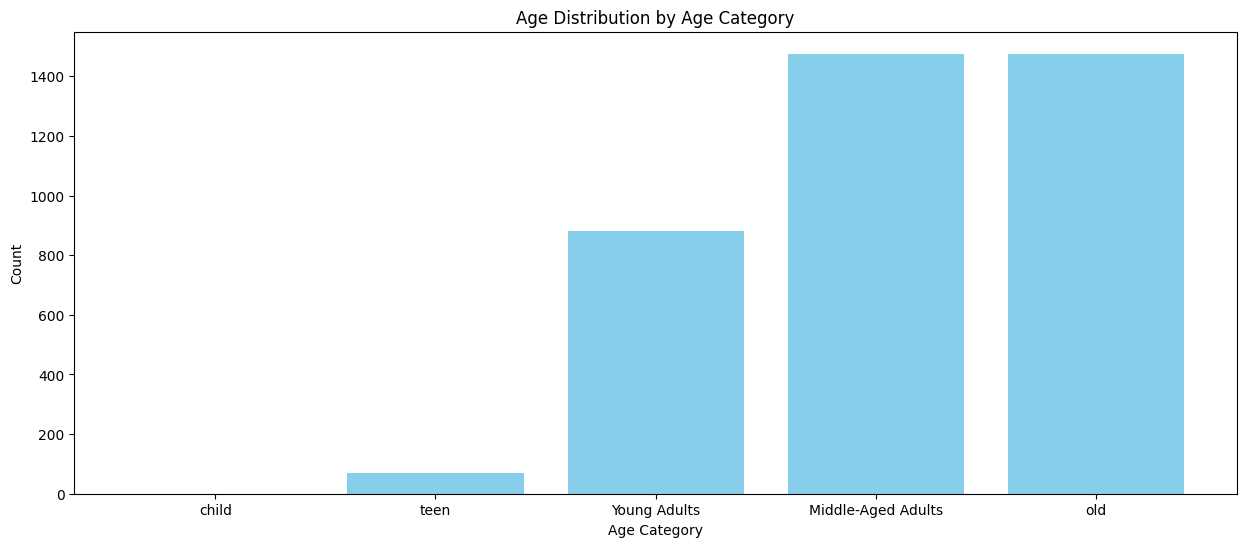

In [238]:
import matplotlib.pyplot as plt 

age_categories = shop.groupby('Age_category')['Age'].count()

plt.figure(figsize=(15,6))
plt.bar(age_categories.index, age_categories.values, color='skyblue')

plt.xlabel("Age Category")
plt.ylabel("Count")
plt.title("Age Distribution by Age Category")

plt.show()

## 2 How does the average purchase amount vary across different product categories?

In [239]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [240]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [241]:
shop.groupby('Category')['Purchase Amount (USD)'].mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

## 3 Which gender has the highest number of purchases?

In [242]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

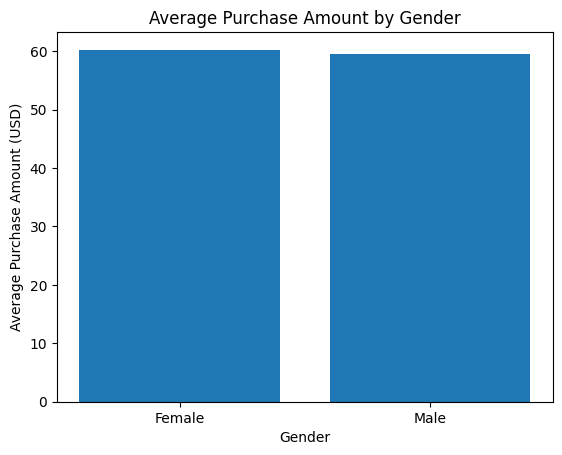

In [243]:
gender_purchase = shop.groupby('Gender')['Purchase Amount (USD)'].mean().reset_index()

fig, ax = plt.subplots()

ax.bar(gender_purchase['Gender'], gender_purchase['Purchase Amount (USD)'])

ax.set_xlabel('Gender')
ax.set_ylabel('Average Purchase Amount (USD)')
ax.set_title('Average Purchase Amount by Gender')

plt.show()

## 4 What are the most commonly purchased items in each category?

In [244]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [245]:
shop.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

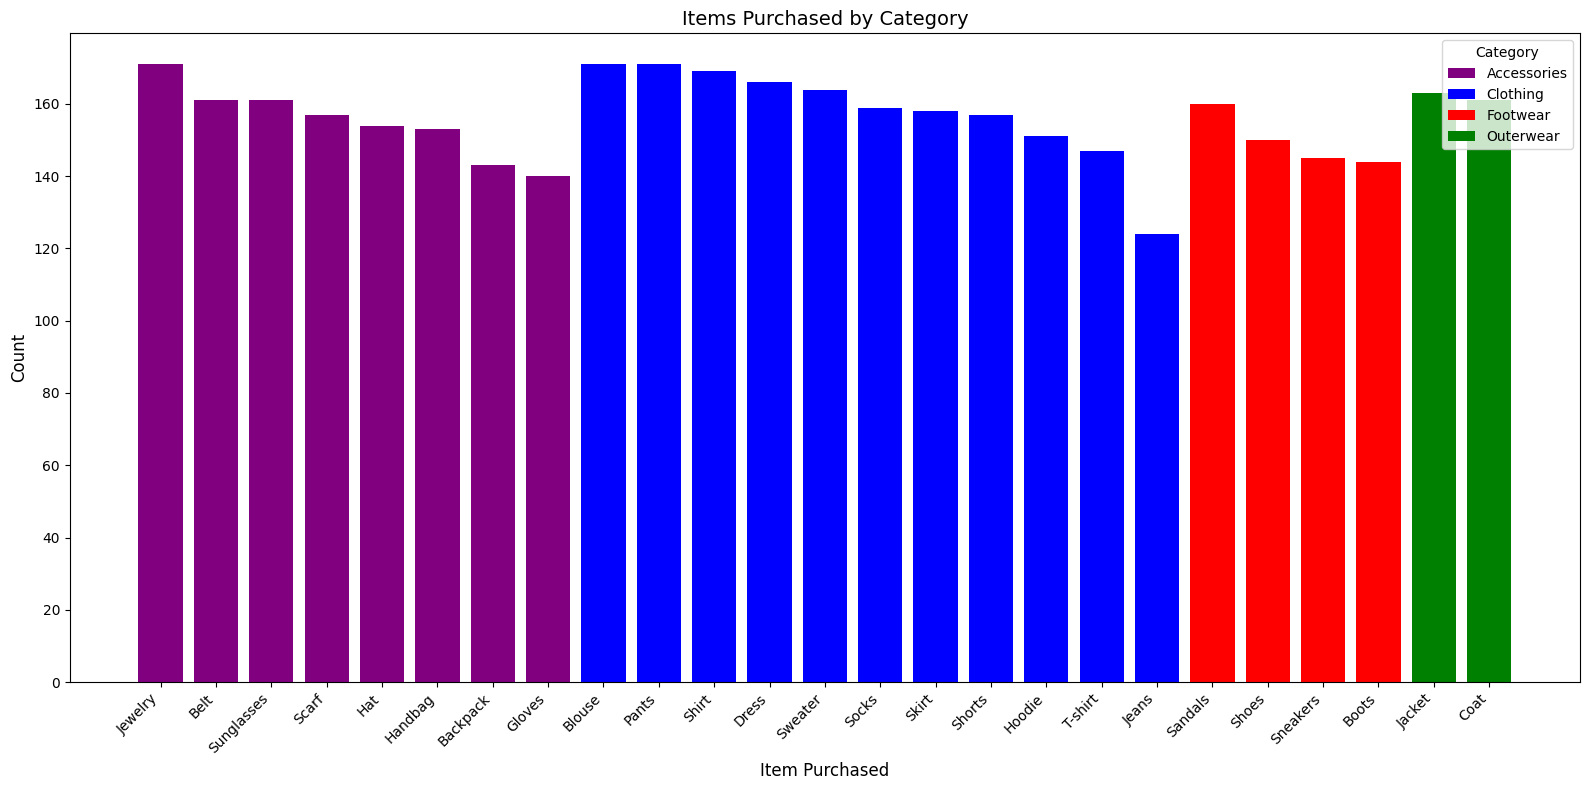

In [246]:
item_counts = shop.groupby('Category')['Item Purchased'].value_counts().reset_index(name='count')

categories = item_counts['Category'].unique()
category_colors = {
    "Clothing": "blue",
    "Footwear": "red",
    "Outerwear": "green",
    "Accessories": "purple",
}

plt.figure(figsize=(16, 8))
for category in categories:
    category_data = item_counts[item_counts['Category'] == category]
    plt.bar(
        category_data['Item Purchased'], 
        category_data['count'], 
        color=category_colors[category], 
        label=category
    )

plt.xlabel("Item Purchased", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Items Purchased by Category", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="Category", fontsize=10)

plt.tight_layout()
plt.show()


## 5 Are there any specific seasons or months where customer spending is significantly higher?

In [247]:
shop['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [248]:
shop[shop['Season'] == 'Summer'].value_counts().sum()

np.int64(955)

In [249]:
shop[shop['Season'] == 'Winter'].value_counts().sum()

np.int64(971)

In [250]:
shop[shop['Season'] == 'Spring'].value_counts().sum()

np.int64(999)

In [251]:
shop[shop['Season'] == 'Fall'].value_counts().sum()

np.int64(975)

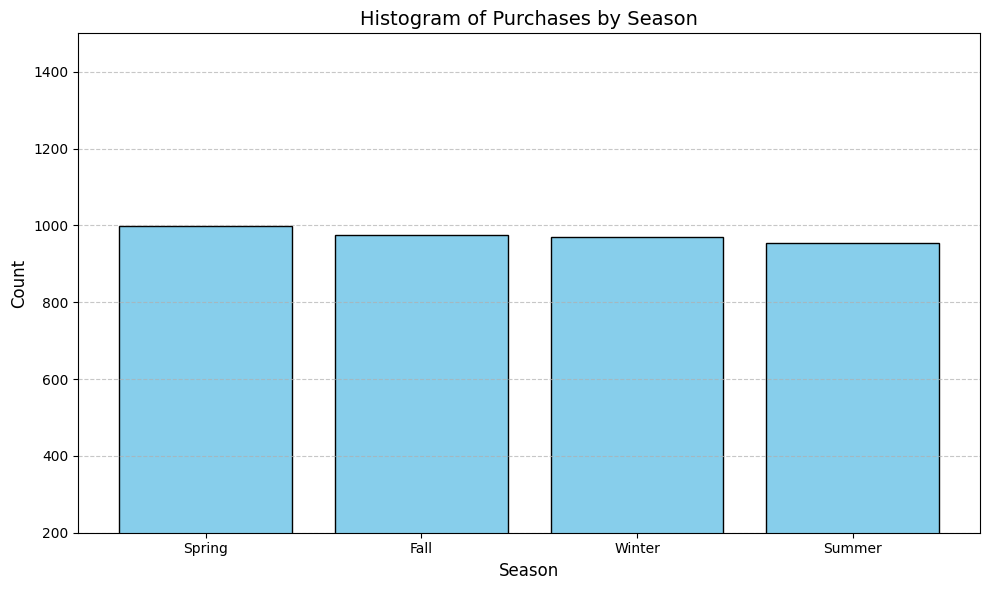

In [252]:
season_counts = shop['Season'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(season_counts.index, season_counts.values, color='skyblue', edgecolor='black')

plt.ylim(200, 1500)

plt.xlabel("Season", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogram of Purchases by Season", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 6 What is the average rating given by customers for each product category?

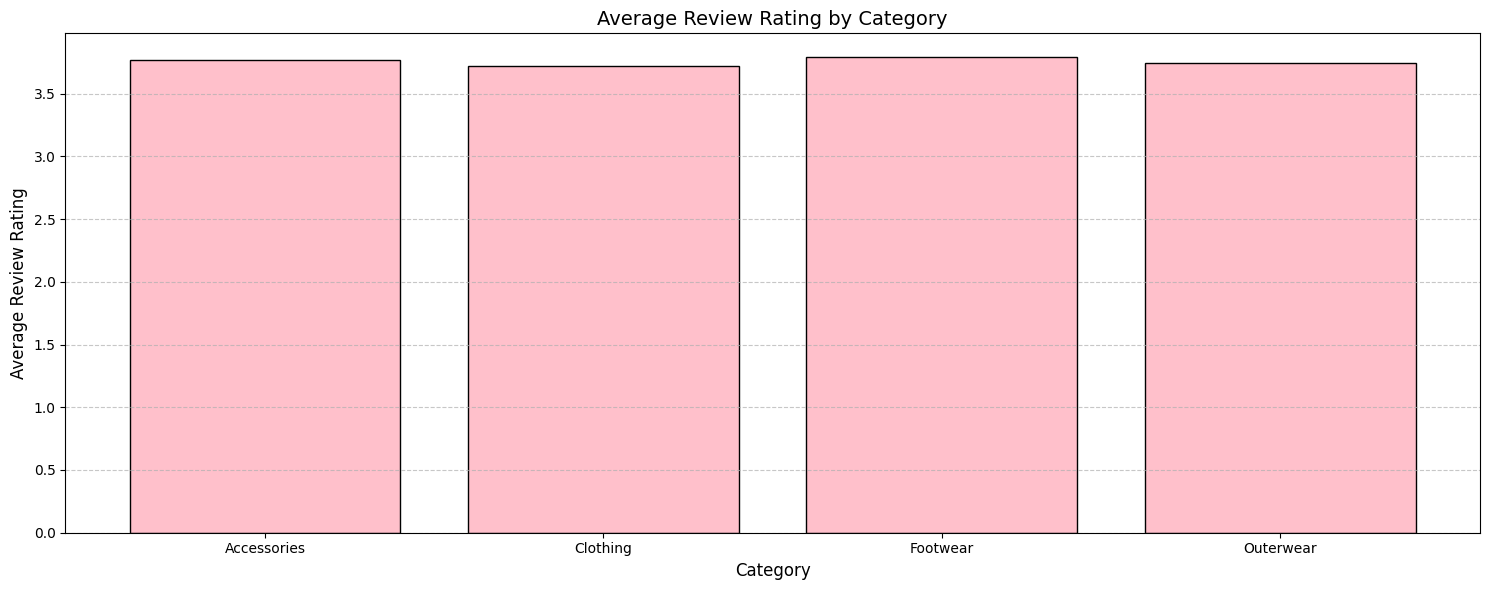

In [253]:
shop_groupby = shop.groupby('Category')['Review Rating'].mean().reset_index()

plt.figure(figsize=(15, 6))
plt.bar(shop_groupby['Category'], shop_groupby['Review Rating'], color='pink', edgecolor='black')

plt.xlabel("Category", fontsize=12)
plt.ylabel("Average Review Rating", fontsize=12)
plt.title("Average Review Rating by Category", fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 7 Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?

In [254]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [255]:
shop['Subscription Status'].unique()

array(['Yes', 'No'], dtype=object)

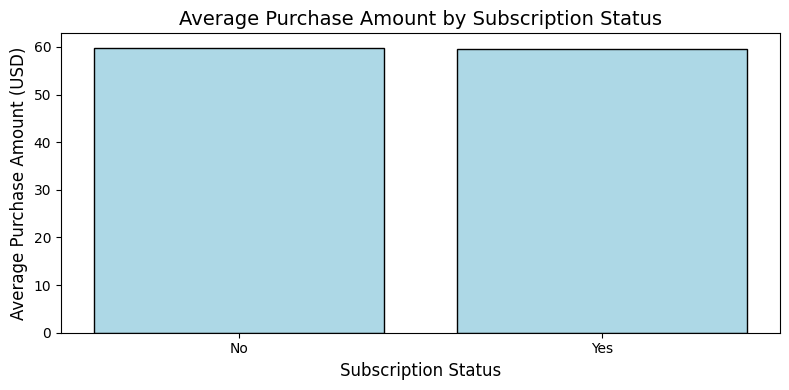

In [256]:
subscription_groupby = shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.bar(subscription_groupby['Subscription Status'], subscription_groupby['Purchase Amount (USD)'], color='lightblue', edgecolor='black')

plt.xlabel("Subscription Status", fontsize=12)
plt.ylabel("Average Purchase Amount (USD)", fontsize=12)
plt.title("Average Purchase Amount by Subscription Status", fontsize=14)

plt.tight_layout()
plt.show()

In [257]:
shop['Purchase Amount (USD)'].sum()

np.int64(233081)

In [258]:
shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64

## 8 Which payment method is the most popular among customers?

In [259]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending= False)

Payment Method
Debit Card       60.915094
Credit Card      60.074516
Bank Transfer    59.712418
Cash             59.704478
PayPal           59.245199
Venmo            58.949527
Name: Purchase Amount (USD), dtype: float64

In [260]:
shop_groupby = shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()

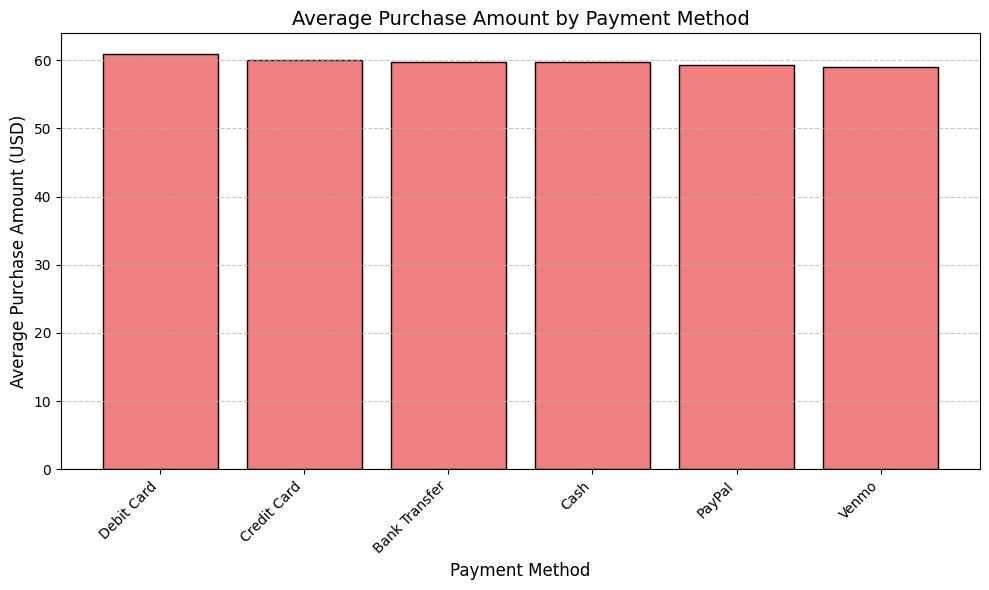

In [261]:
shop_groupby = shop_groupby.sort_values(by='Purchase Amount (USD)', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(shop_groupby['Payment Method'], shop_groupby['Purchase Amount (USD)'], color='lightcoral', edgecolor='black')


plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Average Purchase Amount (USD)", fontsize=12)
plt.title("Average Purchase Amount by Payment Method", fontsize=14)


plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

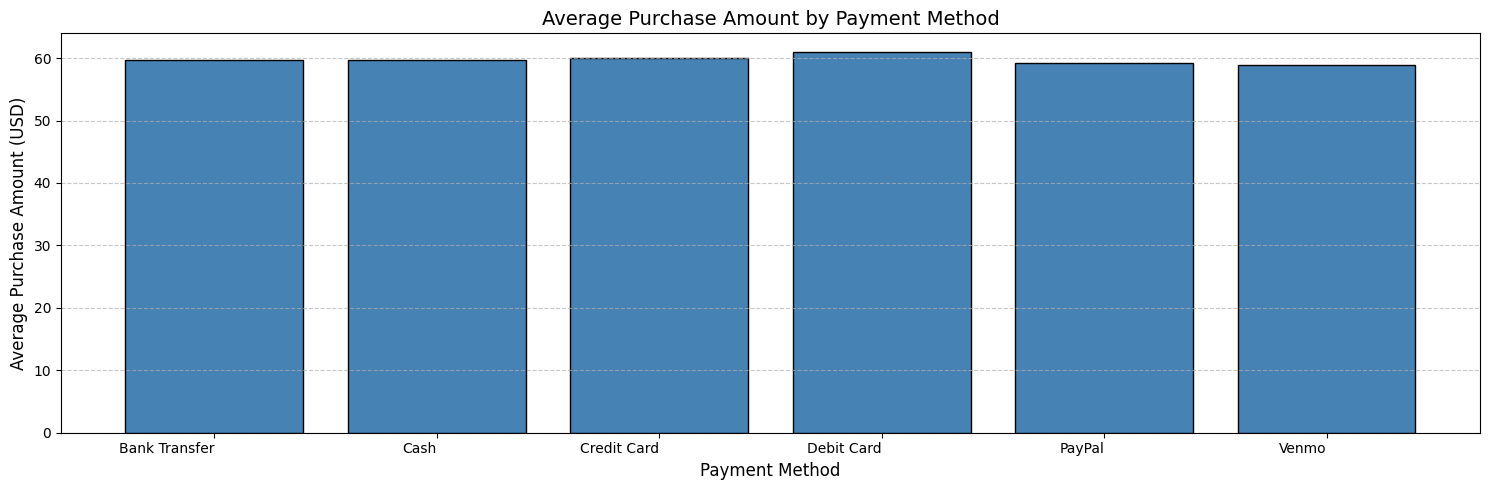

In [262]:
shop_groupby = shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()


plt.figure(figsize=(15, 5))
plt.bar(shop_groupby['Payment Method'], shop_groupby['Purchase Amount (USD)'], color='steelblue', edgecolor='black')


plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Average Purchase Amount (USD)", fontsize=12)
plt.title("Average Purchase Amount by Payment Method", fontsize=14)


plt.xticks(ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 9 Do customers who use promo codes tend to spend more than those who don't?

In [263]:
shop_groupby  = shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

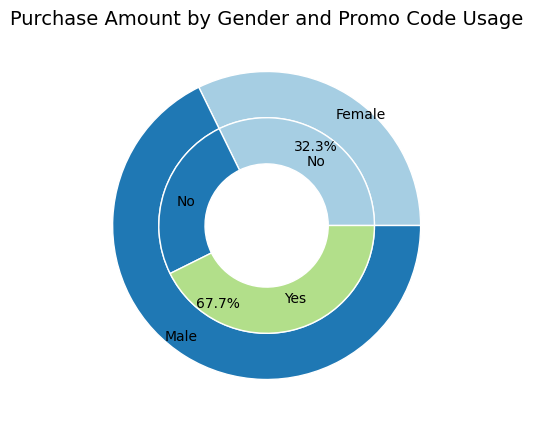

In [264]:
grouped = shop.groupby(['Gender', 'Promo Code Used'])['Purchase Amount (USD)'].sum().reset_index()


gender_data = grouped.groupby('Gender')['Purchase Amount (USD)'].sum()
gender_labels = gender_data.index
gender_sizes = gender_data.values


promo_data = [grouped[grouped['Gender'] == gender]['Purchase Amount (USD)'] for gender in gender_labels]
promo_sizes = [promo.values for promo in promo_data]
promo_labels = [grouped[grouped['Gender'] == gender]['Promo Code Used'].values for gender in gender_labels]


flattened_promo_sizes = [size for sizes in promo_sizes for size in sizes]
flattened_promo_labels = [label for labels in promo_labels for label in labels]


fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(
    gender_sizes, 
    labels=gender_labels, 
    radius=1, 
    wedgeprops=dict(width=0.3, edgecolor='w'),
    labeldistance=0.85,
    colors=plt.cm.Paired(range(len(gender_labels))),
    autopct='%1.1f%%'
)

ax.pie(
    flattened_promo_sizes, 
    labels=flattened_promo_labels, 
    radius=0.7, 
    wedgeprops=dict(width=0.3, edgecolor='w'),
    colors=plt.cm.Paired(range(len(flattened_promo_labels))),
    labeldistance=0.7
)

plt.title("Purchase Amount by Gender and Promo Code Usage", fontsize=14)
plt.show()


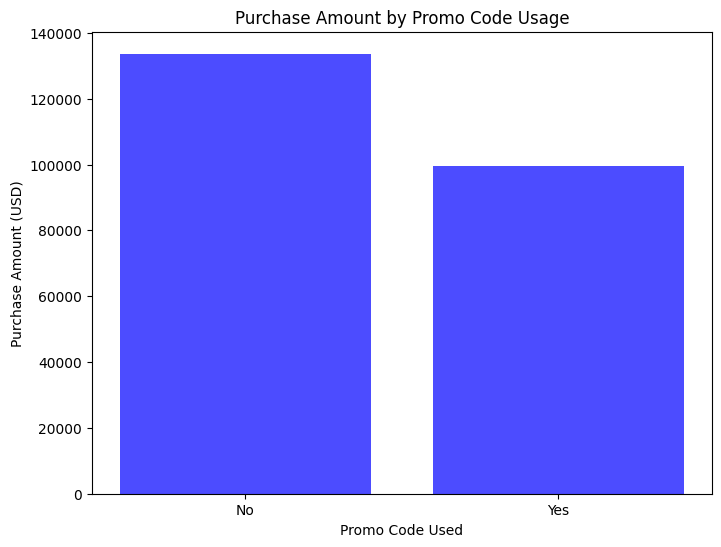

In [265]:
plt.figure(figsize=(8, 6))
plt.bar(
    shop_groupby['Promo Code Used'], 
    shop_groupby['Purchase Amount (USD)'], 
    color='blue', alpha=0.7
)


plt.xlabel('Promo Code Used')
plt.ylabel('Purchase Amount (USD)')
plt.title('Purchase Amount by Promo Code Usage')

plt.show()

## 10 How does the frequency of purchases vary across different age groups?

In [266]:
shop[['Age' , 'Age_category']]

,Age,Age_category
0,55,old
1,19,Young Adults
2,50,Middle-Aged Adults
3,21,Young Adults
4,45,Middle-Aged Adults
...,...,...
3895,40,Middle-Aged Adults
3896,52,old
3897,46,Middle-Aged Adults
3898,44,Middle-Aged Adults


In [267]:
shop['Age_category'].unique()

['old', 'Young Adults', 'Middle-Aged Adults', 'teen']
Categories (5, object): ['child' < 'teen' < 'Young Adults' < 'Middle-Aged Adults' < 'old']

In [268]:
shop_group = shop.groupby('Frequency of Purchases')['Age'].sum()

C:\Users\deard\AppData\Local\Temp\ipykernel_18776\3991799926.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outer_group = shop.groupby(['Frequency of Purchases', 'Age_category'])['Age'].sum().reset_index()


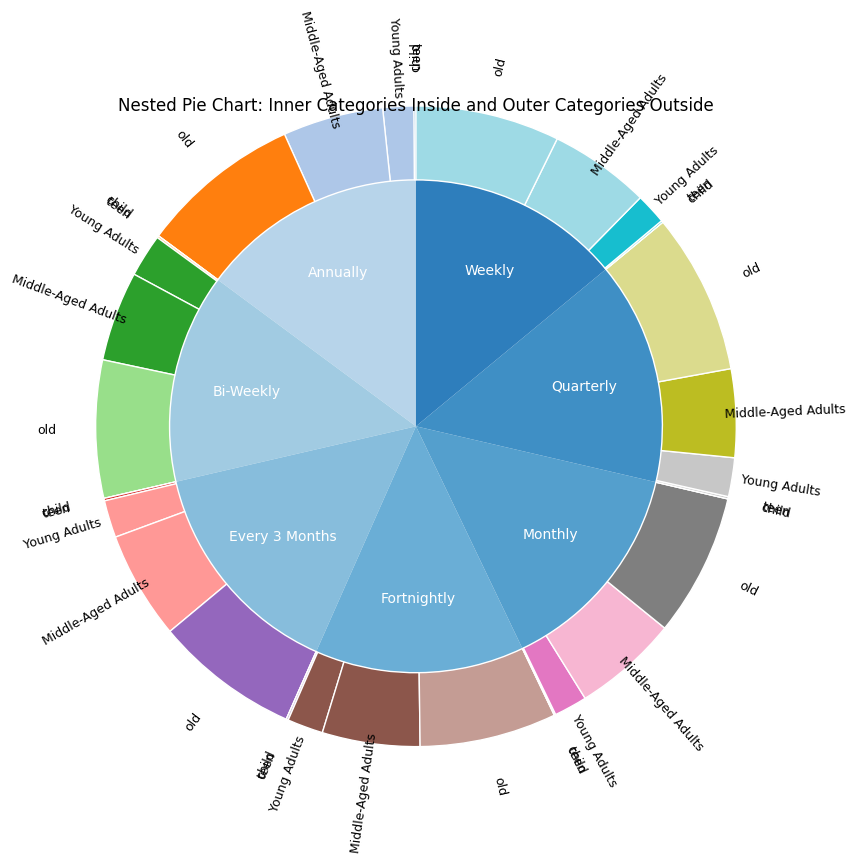

In [269]:
inner_group = shop.groupby('Frequency of Purchases')['Age'].sum()

outer_group = shop.groupby(['Frequency of Purchases', 'Age_category'])['Age'].sum().reset_index()

inner_labels = inner_group.index
inner_sizes = inner_group.values

outer_labels = outer_group['Age_category']
outer_sizes = outer_group['Age']
outer_colors = plt.cm.tab20(np.linspace(0, 1, len(outer_labels)))  

fig, ax = plt.subplots(figsize=(15, 8))

wedges_inner, texts_inner = ax.pie(
    inner_sizes,
    radius=1,
    labels=None,  
    startangle=90,
    colors=plt.cm.Blues(np.linspace(0.3, 0.7, len(inner_labels)))  
)

wedges_outer, _ = ax.pie(
    outer_sizes,
    radius=1.3,
    labels=None, 
    startangle=90,
    colors=outer_colors,
    wedgeprops=dict(width=0.3, edgecolor='white')  
)

for wedge, label in zip(wedges_inner, inner_labels):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.radians(angle)) * 0.7  
    y = np.sin(np.radians(angle)) * 0.7
    ax.text(x, y, label, ha='center', va='center', fontsize=10, color='white') 

for wedge, label in zip(wedges_outer, outer_labels):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.radians(angle)) * 1.5 
    y = np.sin(np.radians(angle)) * 1.5

    rotation = angle if angle <= 90 or angle >= 270 else angle - 180  

    ax.text(x, y, label, ha='center', va='center', fontsize=9, color='black', rotation=rotation)

plt.title('Nested Pie Chart: Inner Categories Inside and Outer Categories Outside')

plt.show()

## 11 Are there any correlations between the size of the product and the purchase amount?

In [270]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [271]:
shop_group = shop.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()

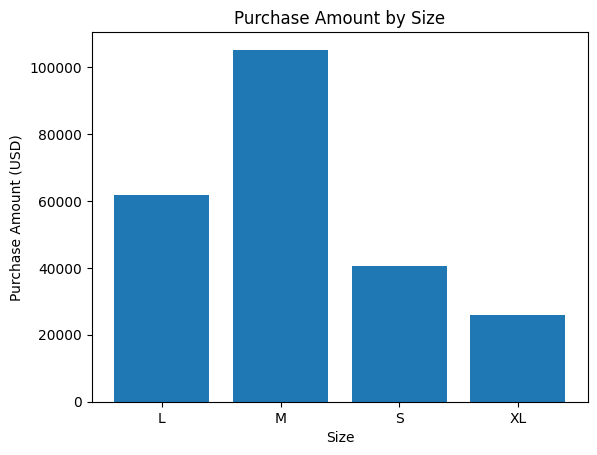

In [272]:
plt.bar(shop_group['Size'], shop_group['Purchase Amount (USD)'])

plt.xlabel('Size')
plt.ylabel('Purchase Amount (USD)')
plt.title('Purchase Amount by Size')

plt.show()

## 12 Which shipping type is preferred by customers for different product categories?

In [273]:
shop.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending= False)

Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64

In [274]:
shop['Shipping_Category'] =shop['Shipping Type'].map({'Express': 0, 'Free Shipping': 1, 'Next Day Air': 2,'Standard': 3, '2-Day Shipping': 4, 'Store Pickup': 5})

In [275]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [276]:
shop['Category_num'] =shop['Category'].map({'Clothing':1, 'Footwear':2, 'Outerwear':3, 'Accessories':4})

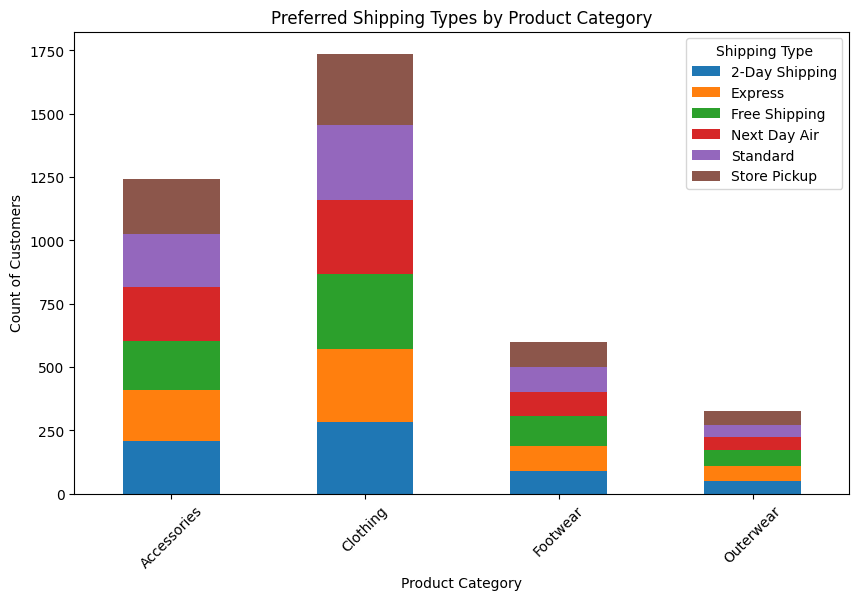

In [277]:
shipping_preference = shop.groupby(['Category', 'Shipping Type']).size().unstack().fillna(0)

shipping_preference.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Preferred Shipping Types by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.legend(title='Shipping Type')

plt.show()

## 13 How does the presence of a discount affect the purchase decision of customers?

In [278]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category',
       'Shipping_Category', 'Category_num'],
      dtype='object')

In [279]:
shop_group = shop.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

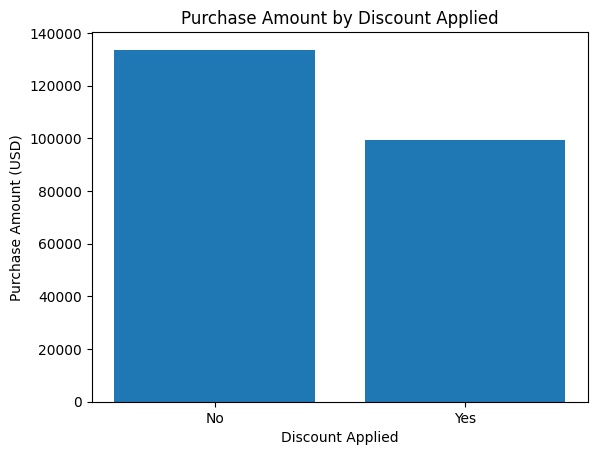

In [280]:
agg_data = shop_group.groupby('Discount Applied')['Purchase Amount (USD)'].sum()

plt.bar(agg_data.index, agg_data.values)

plt.xlabel('Discount Applied')
plt.ylabel('Purchase Amount (USD)')
plt.title('Purchase Amount by Discount Applied')

plt.show()

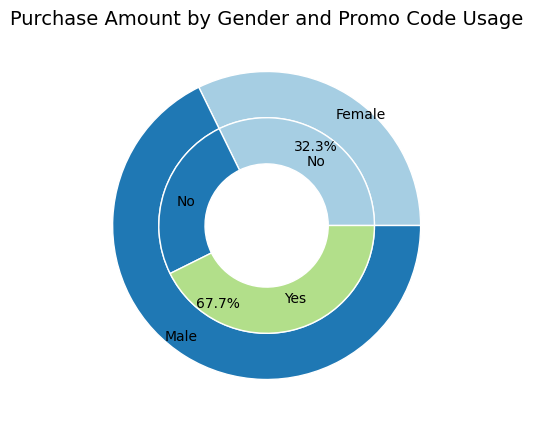

In [281]:
grouped = shop.groupby(['Gender', 'Promo Code Used'])['Purchase Amount (USD)'].sum().reset_index()

gender_data = grouped.groupby('Gender')['Purchase Amount (USD)'].sum()
gender_labels = gender_data.index
gender_sizes = gender_data.values

promo_data = [grouped[grouped['Gender'] == gender]['Purchase Amount (USD)'] for gender in gender_labels]
promo_sizes = [promo.values for promo in promo_data]
promo_labels = [grouped[grouped['Gender'] == gender]['Promo Code Used'].values for gender in gender_labels]

flattened_promo_sizes = [size for sizes in promo_sizes for size in sizes]
flattened_promo_labels = [label for labels in promo_labels for label in labels]

fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(
    gender_sizes, 
    labels=gender_labels, 
    radius=1, 
    wedgeprops=dict(width=0.3, edgecolor='w'),
    labeldistance=0.85,
    colors=plt.cm.Paired(range(len(gender_labels))),
    autopct='%1.1f%%'
)

ax.pie(
    flattened_promo_sizes, 
    labels=flattened_promo_labels, 
    radius=0.7, 
    wedgeprops=dict(width=0.3, edgecolor='w'),
    colors=plt.cm.Paired(range(len(flattened_promo_labels))),
    labeldistance=0.7
)

plt.title("Purchase Amount by Gender and Promo Code Usage", fontsize=14)
plt.show()

## 14 Are there any specific colors that are more popular among customers?

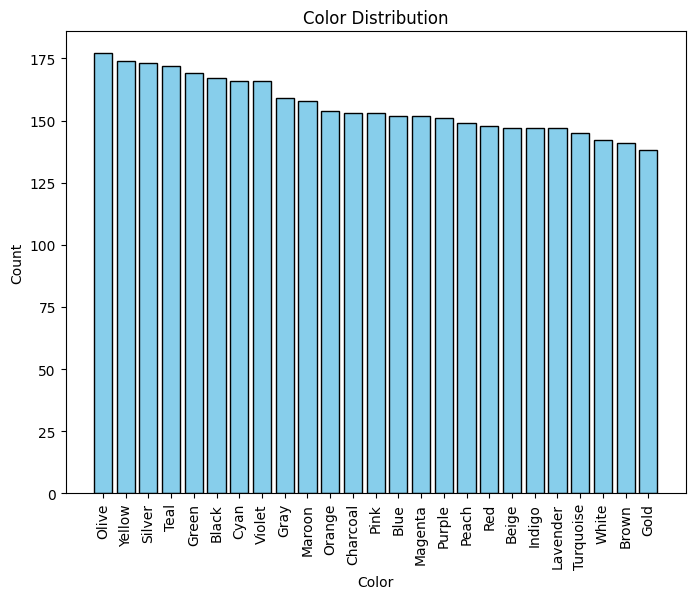

In [282]:
color_counts = shop['Color'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(color_counts.index, color_counts.values, color='skyblue', edgecolor='black')

plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Color Distribution')
plt.xticks(rotation=90)
plt.show()

In [283]:
shop['Color'].value_counts().nlargest(5)

Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: count, dtype: int64

## 15 What is the average number of previous purchases made by customers?

In [284]:
shop['Previous Purchases'].mean()

np.float64(25.35153846153846)

## 16 How does the purchase amount differ based on the review ratings given by customers?

In [293]:
purchase_by_rating = shop.groupby('Review Rating')['Purchase Amount (USD)'].mean().reset_index()

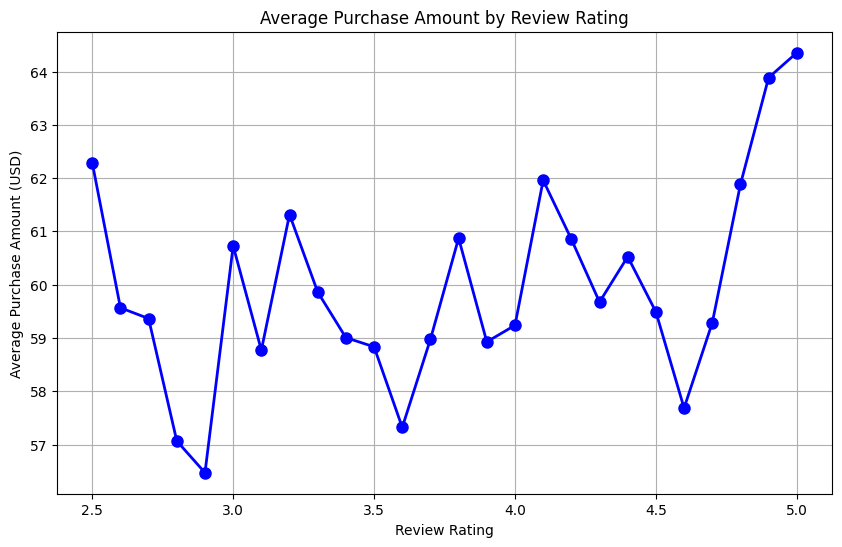

In [295]:
purchase_by_rating = shop.groupby('Review Rating')['Purchase Amount (USD)'].mean().reset_index()

# Sort data if needed (optional)
purchase_by_rating = purchase_by_rating.sort_values('Review Rating')

# Create a line plot
plt.figure(figsize=(10,6))
plt.plot(purchase_by_rating['Review Rating'], purchase_by_rating['Purchase Amount (USD)'], marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Add labels and title
plt.xlabel('Review Rating')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Purchase Amount by Review Rating')
plt.grid(True)

# Show the plot
plt.show()

## 17 Are there any noticeable differences in purchase behavior between different locations?

In [285]:
shop.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending = False)

Location
Alaska            67.597222
Pennsylvania      66.567568
Arizona           66.553846
West Virginia     63.876543
Nevada            63.379310
Washington        63.328767
North Dakota      62.891566
Virginia          62.883117
Utah              62.577465
Michigan          62.095890
Tennessee         61.974026
New Mexico        61.901235
Rhode Island      61.444444
Texas             61.194805
Arkansas          61.113924
Illinois          61.054348
Mississippi       61.037500
Massachusetts     60.888889
Iowa              60.884058
North Carolina    60.794872
Wyoming           60.690141
South Dakota      60.514286
New York          60.425287
Ohio              60.376623
Montana           60.250000
Idaho             60.075269
Nebraska          59.448276
New Hampshire     59.422535
Alabama           59.112360
California        59.000000
Indiana           58.924051
Georgia           58.797468
South Carolina    58.407895
Oklahoma          58.346667
Missouri          57.913580
Hawaii     

In [286]:
shop_group = shop.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

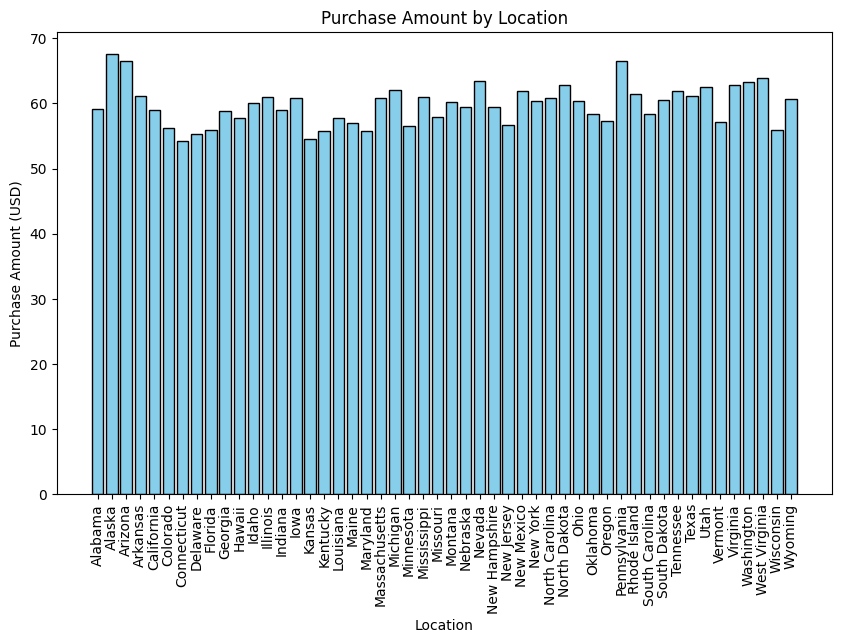

In [287]:
locations = shop_group['Location']
purchase_amounts = shop_group['Purchase Amount (USD)']

plt.figure(figsize=(10, 6))
plt.bar(locations, purchase_amounts, color='skyblue', edgecolor='black')

plt.xlabel('Location')
plt.ylabel('Purchase Amount (USD)')
plt.title('Purchase Amount by Location')

plt.xticks(rotation=90)

plt.show()

## 18 Is there a relationship between customer age and the category of products they purchase?

In [288]:
shop_group = shop.groupby('Category')['Age'].mean().reset_index()

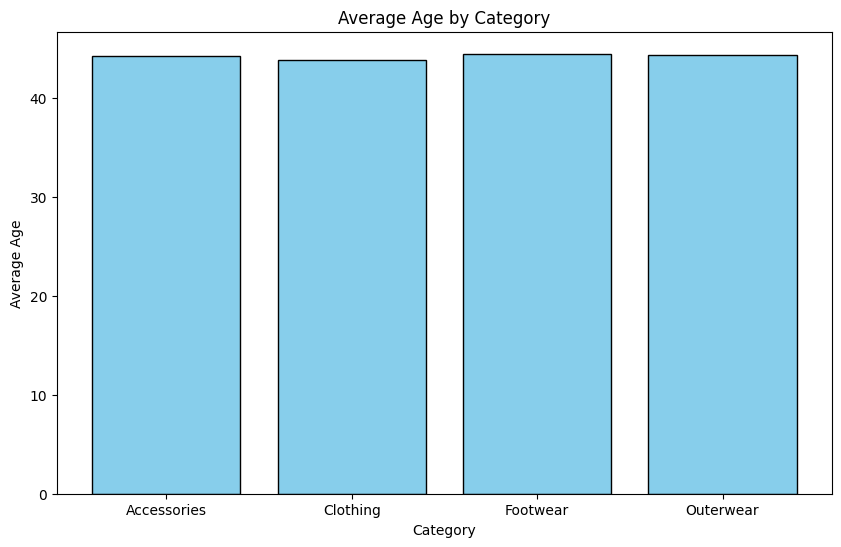

In [289]:

categories = shop_group['Category']
ages = shop_group['Age']

plt.figure(figsize=(10, 6))
plt.bar(categories, ages, color='skyblue', edgecolor='black')

plt.xlabel('Category')
plt.ylabel('Average Age')
plt.title('Average Age by Category')


plt.show()

## 19 How does the average purchase amount differ between male and female customers?

In [290]:
shop_group = shop.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()

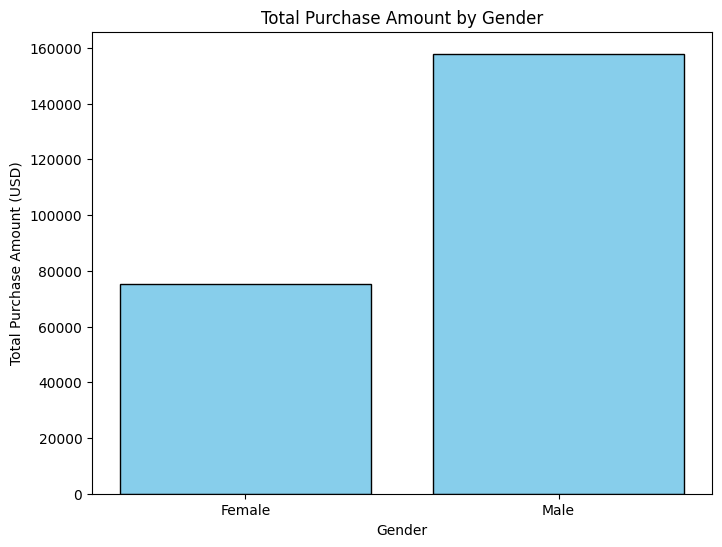

In [291]:

genders = shop_group['Gender']
purchase_amounts = shop_group['Purchase Amount (USD)']

plt.figure(figsize=(8, 6))
plt.bar(genders, purchase_amounts, color='skyblue', edgecolor='black')

plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Total Purchase Amount by Gender')

plt.show()

Missing key in colors: teen_f
Missing key in colors: teen


C:\Users\deard\AppData\Local\Temp\ipykernel_18776\465147187.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shop_group = shop.groupby(['Gender', 'Age_category'])['Purchase Amount (USD)'].sum().reset_index()


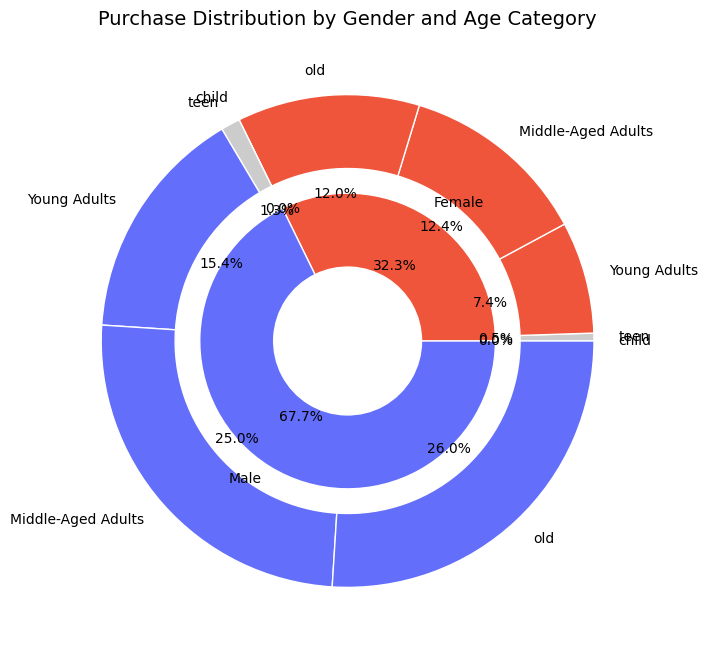

In [292]:
shop_group = shop.groupby(['Gender', 'Age_category'])['Purchase Amount (USD)'].sum().reset_index()

# Extract unique values
genders = shop_group['Gender'].unique()
gender_sums = shop_group.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()

# Assign colors (matching Plotly)
colors = {
    'Male': '#636EFA', 'Female': '#EF553B',  # Inner ring colors
    'Young Adults': '#636EFA', 'Middle-Aged Adults': '#636EFA', 'old': '#636EFA', 'child': '#636EFA',  # Male's shades
    'Young Adults_f': '#EF553B', 'Middle-Aged Adults_f': '#EF553B', 'old_f': '#EF553B', 'child_f': '#EF553B'  # Female's shades
}

# Creating the figure
fig, ax = plt.subplots(figsize=(8, 8))

# Inner Ring (Gender Distribution)
inner_colors = [colors[gender] for gender in genders]
ax.pie(gender_sums['Purchase Amount (USD)'], labels=gender_sums['Gender'], radius=0.6, 
       colors=inner_colors, wedgeprops=dict(width=0.3, edgecolor='w'), autopct='%1.1f%%')

# Outer Ring (Age Category Distribution within Gender)
outer_labels = []
outer_sizes = []
outer_colors = []

for gender in genders:
    sub_data = shop_group[shop_group['Gender'] == gender]
    outer_labels.extend(sub_data['Age_category'])
    outer_sizes.extend(sub_data['Purchase Amount (USD)'])

    # Apply different shades for Male & Female
    for age in sub_data['Age_category']:
        key = age if gender == 'Male' else f"{age}_f"
        if key not in colors:
            print(f"Missing key in colors: {key}")  # Debugging print
            colors[key] = '#CCCCCC'  # Default fallback color

        outer_colors.append(colors[key])

ax.pie(outer_sizes, labels=outer_labels, radius=1, colors=outer_colors, 
       wedgeprops=dict(width=0.3, edgecolor='w'), autopct='%1.1f%%')

# Title
plt.title("Purchase Distribution by Gender and Age Category", fontsize=14)
plt.show()
